# Homework-2: Softmax for MNIST Classification

### In this homework, you need to
- ### implement and apply a softmax classifier to perform digits classification.

In [1]:
import os,sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load MNIST Dataset
The **mnist_data_loader.py** is a script to load mnist dataset, which is included in [TensorFlow tutorial](https://github.com/tensorflow/tensorflow/blob/r0.7/tensorflow/examples/tutorials/mnist/input_data.py).

In [2]:
import mnist_data_loader

mnist_dataset = mnist_data_loader.read_data_sets("./MNIST_data/", one_hot=True)

# training dataset
train_set = mnist_dataset.train 
# test dataset
test_set = mnist_dataset.test   

train_size = train_set.num_examples
test_size = test_set.num_examples
print()
print('Training dataset size: ', train_size)
print('Test dataset size: ', test_size)

Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz

Training dataset size:  60000
Test dataset size:  10000


## Data Example
To have a better understand of MNIST dataset, we can visualize some examples in MNIST.

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


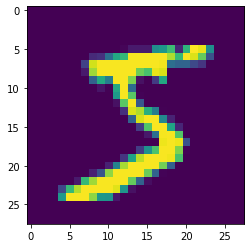

In [3]:
# You can choose any image in training set to visualize, example_id ∈ [0,60000)
example_id = 0 

image = train_set.images[example_id] # shape = 784 (28*28)
label = train_set.labels[example_id] # shape = 10
#print(image)
print(label)
plt.imshow(np.reshape(image,[28,28]))

## Set Hyerparameters
You can modify hyerparameters by yourself.

In [35]:
batch_size = 64
max_epoch = 20
learning_rate = 0.1

# For regularization
lamda = 0.2

### TODO
Before executing the following code, you should accomplish **./softmax_classifier.py**.

In [5]:
from softmax_classifier import softmax_classifier

## Train

In [36]:
# Weight Initialization
W = np.random.randn(28*28, 10) * 0.001

loss_set = []
accu_set = []
disp_freq = 100

# Training process
for epoch in range(0, max_epoch):
    iter_per_batch = train_size // batch_size
    for batch_id in range(0, iter_per_batch):
        batch = train_set.next_batch(batch_size) # get data of next batch
        input, label = batch
        
        # softmax_classifier
        loss, gradient, prediction = softmax_classifier(W, input , label, lamda)
        
        # Calculate accuracy
        label = np.argmax(label, axis=1) # scalar representation
        accuracy = sum(prediction == label) / float(len(label))
        
        loss_set.append(loss)
        accu_set.append(accuracy)
        
        # Update weights
        W = W - (learning_rate * gradient)
        if batch_id % disp_freq == 0:
            print("Epoch [{}][{}]\t Batch [{}][{}]\t Training Loss {:.4f}\t Accuracy {:.4f}".format(
                epoch, max_epoch, batch_id, iter_per_batch, 
                loss, accuracy))
    print()

Epoch [0][20]	 Batch [0][937]	 Training Loss 2.3128	 Accuracy 0.0781
Epoch [0][20]	 Batch [100][937]	 Training Loss 0.8847	 Accuracy 0.9219
Epoch [0][20]	 Batch [200][937]	 Training Loss 0.8980	 Accuracy 0.9062
Epoch [0][20]	 Batch [300][937]	 Training Loss 0.8393	 Accuracy 0.9219
Epoch [0][20]	 Batch [400][937]	 Training Loss 0.8670	 Accuracy 0.9375
Epoch [0][20]	 Batch [500][937]	 Training Loss 1.0256	 Accuracy 0.8750
Epoch [0][20]	 Batch [600][937]	 Training Loss 1.0005	 Accuracy 0.9375
Epoch [0][20]	 Batch [700][937]	 Training Loss 1.0915	 Accuracy 0.8750
Epoch [0][20]	 Batch [800][937]	 Training Loss 1.0328	 Accuracy 0.8750
Epoch [0][20]	 Batch [900][937]	 Training Loss 1.2617	 Accuracy 0.8594

Epoch [1][20]	 Batch [0][937]	 Training Loss 0.9816	 Accuracy 0.9688
Epoch [1][20]	 Batch [100][937]	 Training Loss 1.2026	 Accuracy 0.8750
Epoch [1][20]	 Batch [200][937]	 Training Loss 1.0916	 Accuracy 0.9219
Epoch [1][20]	 Batch [300][937]	 Training Loss 1.0072	 Accuracy 0.9375
Epoch [1]

## Test

In [34]:
correct = 0
iter_per_batch = test_size // batch_size

# Test process
for batch_id in range(0, iter_per_batch):
    batch = test_set.next_batch(batch_size)
    data, label = batch
    
    # We only need prediction results in testing
    _,_, prediction = softmax_classifier(W, data , label, lamda)
    label = np.argmax(label, axis=1)
    
    correct += sum(prediction == label)
    
accuracy = correct * 1.0 / test_size
print('Test Accuracy: ', accuracy)

Test Accuracy:  0.9164


## Plot

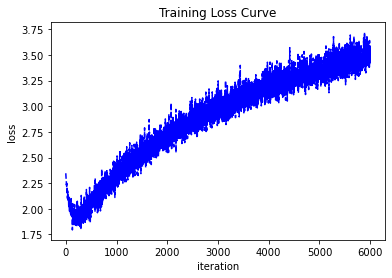

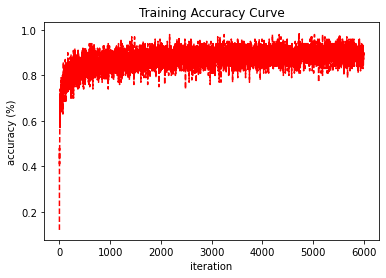

In [28]:
# training loss curve
fig, _ = plt.subplots()
plt.plot(loss_set, 'b--')
plt.title("Training Loss Curve")
plt.xlabel('iteration')
plt.ylabel('loss')
fig.savefig("soft_loss.png", dpi=300)
# training accuracy curve
fig, _ = plt.subplots()
plt.plot(accu_set, 'r--')
plt.title("Training Accuracy Curve")
plt.xlabel('iteration')
plt.ylabel('accuracy (%)');
fig.savefig("soft_acc.png", dpi=300)

### You have finished homework2-softmax, congratulations!